In [53]:
# Procesado y tratamiento de los datos
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.over_sampling import SMOTEN

# División del dataset
from sklearn.model_selection import train_test_split

# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Modelos utilizados 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas de evaluación
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Otros
import warnings 
warnings.filterwarnings('ignore')

In [54]:
# Lectura del dataset 
data = pd.read_csv('Social_Network_Ads.csv')
# Visualización inicial del conjunto de datos
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


## Análisis exploratorio de los datos

In [55]:
# Visualizamos la información básica del conjunto de datos
# Indica el número de filas del dataset
# Muestra el número de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [56]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
data.shape

(400, 5)

In [57]:
# Validación de datos duplicados
data.duplicated().sum()

0

In [58]:
# Número de datos ausentes por variable
print(data.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [59]:
# Eliminación de datos que son irrelevantes y que podrían afectar el resultado.
df = data.drop(['User ID'], axis=1)

In [60]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [61]:
# Visualización de la información estadística del conjunto de datos
# Para la variable categórica Género
df.select_dtypes(include=['object']).describe()

,Gender
count,400
unique,2
top,Female
freq,204


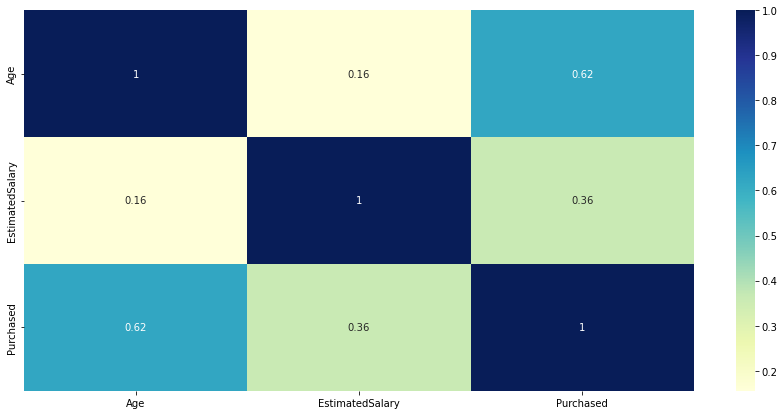

In [62]:
# Validamos correlaciones
correlation = df.corr()
fig = plt.figure (figsize = (15,7))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

In [63]:
# Verificamos cuales son las variables que poseen mas correlación con respecto a la variable de salida
df.corr()['Purchased'].sort_values()

EstimatedSalary    0.362083
Age                0.622454
Purchased          1.000000
Name: Purchased, dtype: float64

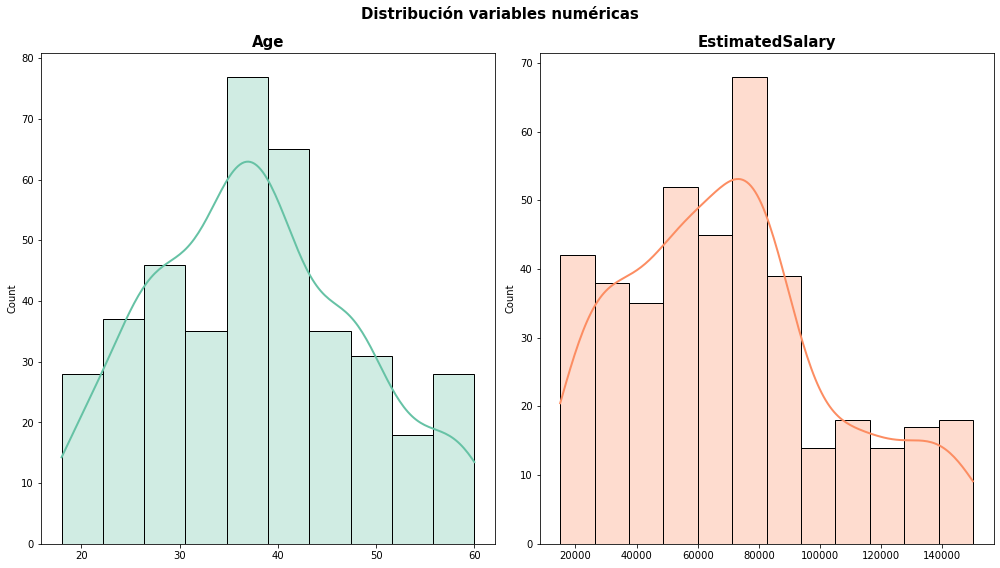

In [64]:
# Gráficas de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('Purchased')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna 
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
#for i in [5]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

<Figure size 432x288 with 0 Axes>

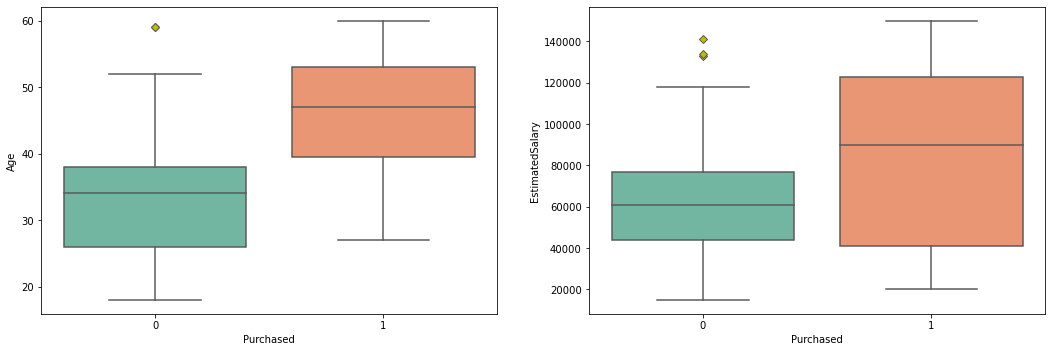

In [65]:
# Boxplot for class
den=pd.DataFrame(df)
plt.figure (1)
plt.subplots(figsize=(18,26))
green_diamond = dict(markerfacecolor='y', marker='D')
sns.set_palette("Set2")

plt.subplot(421)
sns.boxplot(x='Purchased', y='Age', data=den, flierprops=green_diamond)

plt.subplot(422)
sns.boxplot(x='Purchased', y='EstimatedSalary', data=den, flierprops=green_diamond)

plt.show() 

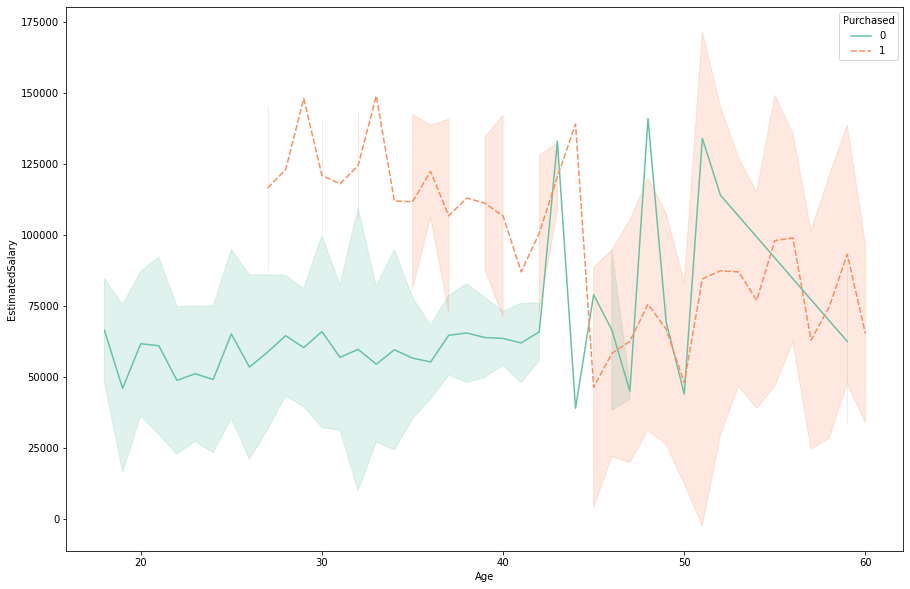

In [66]:
figura2 = plt.subplots(figsize= (15,10))

sns.lineplot(data=df, 
            x="Age",
            y="EstimatedSalary",  
            hue="Purchased", 
            style="Purchased",
            ci="sd")

plt.show()

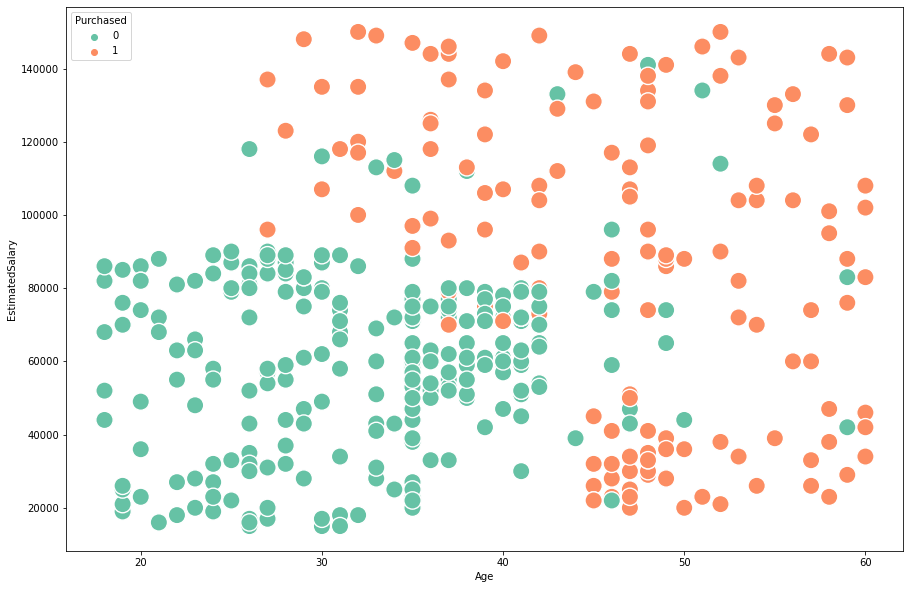

In [67]:
figura2= plt.subplots(figsize= (15,10))

sns.scatterplot(data=df, 
            x="Age",
            y="EstimatedSalary",  
            hue="Purchased", 
            s=300)

plt.show()

Text(0.5, 1.06, 'Gráfica de la cantidad de personas por género que hicieron si o no click en el anuncio')

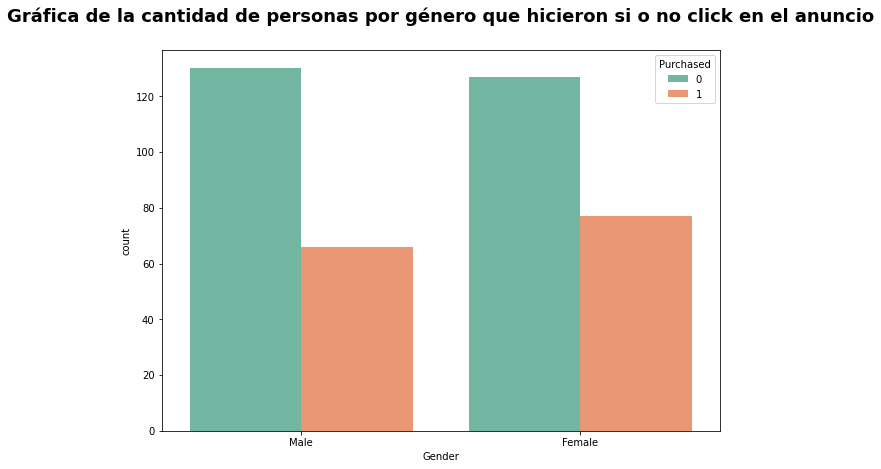

In [68]:
# Creación de una gráfica por género de las personas que hicieron si o no click al anuncio
plt.figure(figsize=[10,7])
sns.countplot(x = 'Gender', hue = 'Purchased', data = df)
plt.title('Gráfica de la cantidad de personas por género que hicieron si o no click en el anuncio', weight='bold', y=1.06,fontsize=18)

## Balanceo del dataset

In [69]:
# Del conjunto de datos general separamos la variable de salida del resto de datos
X_df = df.drop("Purchased", axis=1)
y_df = df["Purchased"].copy()

In [70]:
# Validamos la cantidad de casos de personas que hicieron click en el anuncio para realizar la compra
# Con esto podemos verificar si nuestro dataset esta desbalanceado y necesita que apliquemos alguna técnica de balanceo de datos. 
si = y_df.sum()
no = y_df.shape[0]- si
print('Personas que no hicieron click en la publicación:',no,'Personas que si hicieron click en la publicación:', si)

Personas que no hicieron click en la publicación: 257 Personas que si hicieron click en la publicación: 143


In [71]:
# https://imbalanced-learn.org/dev/over_sampling.html
# Inicializamos el método de sobremuestreo
sampler = SMOTEN(random_state=0)
# Le pasamos el dataset
X_smoten, y_smoten = sampler.fit_resample(X_df, y_df)
# Hacemos un nuevo recuento para validar la cantidad de datos por cada caso
si_smoten = y_smoten.sum()
no_smoten = y_smoten.shape[0]- si_smoten
print('Personas que no hicieron click en la publicación:', si_smoten ,'que si hicieron click en la publicación:', no_smoten)
# Visualizamos el dataset equilibrado para ambos casos 
X_smoten

Personas que no hicieron click en la publicación: 257 que si hicieron click en la publicación: 257


,Gender,Age,EstimatedSalary
0,Male,19.0,19000.0
1,Male,35.0,20000.0
2,Female,26.0,43000.0
3,Female,27.0,57000.0
4,Male,19.0,76000.0
...,...,...,...
509,Female,49.0,28000.0
510,Female,47.0,26000.0
511,Female,48.0,108000.0
512,Female,46.0,117000.0


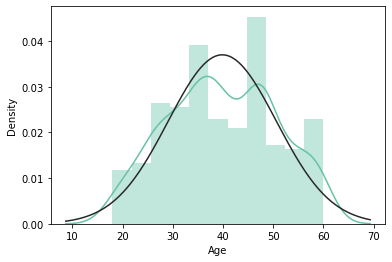

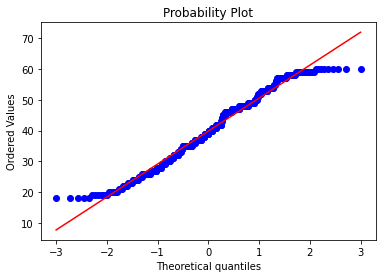

In [72]:
# Histograma y gráfico de probabilidad normal para la variable Edad:
sns.distplot(X_smoten['Age'], fit = norm);
fig = plt.figure()
res = stats.probplot(X_smoten['Age'], plot = plt)

In [73]:
# Transformación de los datos para la variable Edad
X_smoten['Age'] = np.log(X_smoten['Age'])

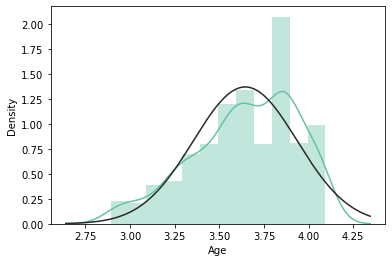

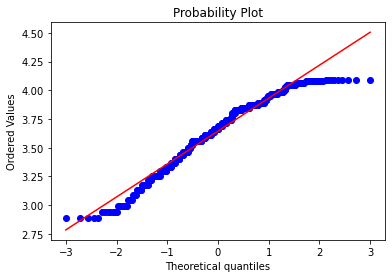

In [74]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados de la variable Edad:
sns.distplot(X_smoten['Age'], fit = norm);
fig = plt.figure()
res = stats.probplot(X_smoten['Age'], plot = plt)

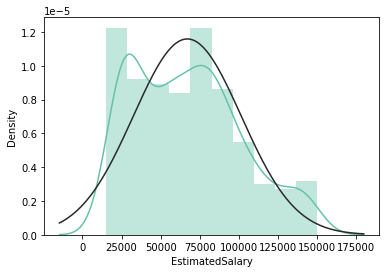

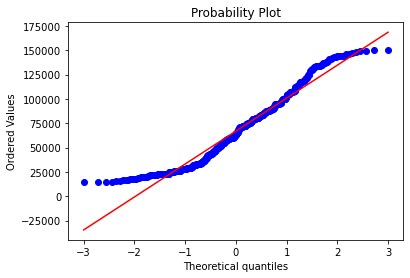

In [75]:
# Histograma y gráfico de probabilidad normal para la variable salario estimado:
sns.distplot(X_smoten['EstimatedSalary'], fit = norm);
fig = plt.figure()
res = stats.probplot(X_smoten['EstimatedSalary'], plot = plt)

In [76]:
# Transformación de los datos para la variable salario estimado:
X_smoten['EstimatedSalary'] = np.log(X_smoten['EstimatedSalary'])

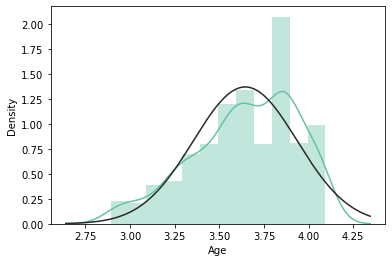

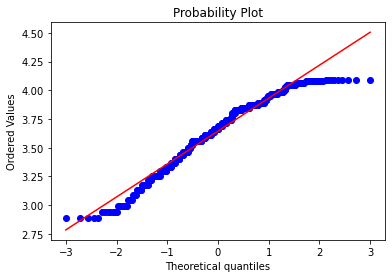

In [77]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados de la variable salario estimado:
sns.distplot(X_smoten['Age'], fit = norm);
fig = plt.figure()
res = stats.probplot(X_smoten['Age'], plot = plt)

## Escalado de las variables numéricas

In [78]:
# Separamos las columnas numéricas para escalarlas
colum_scal = X_smoten[["Age", "EstimatedSalary"]]
colum_scal

,Age,EstimatedSalary
0,2.944439,9.852194
1,3.555348,9.903488
2,3.258097,10.668955
3,3.295837,10.950807
4,2.944439,11.238489
...,...,...
509,3.891820,10.239960
510,3.850148,10.165852
511,3.871201,11.589887
512,3.828641,11.669929


In [79]:
# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(colum_scal)
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=colum_scal.columns, index=colum_scal.index)
# Visualización de los cambios
X_scaled

,Age,EstimatedSalary
0,-2.408696,-1.922904
1,-0.309134,-1.833958
2,-1.330723,-0.506590
3,-1.201018,-0.017843
4,-2.408696,0.481015
...,...,...
509,0.847248,-1.250495
510,0.704028,-1.379003
511,0.776384,1.090360
512,0.630116,1.229159


In [80]:
# Pasar las características transformadas al dataset original
df_new = X_smoten.drop(["Age", "EstimatedSalary"], axis=1)
df_new

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
509,Female
510,Female
511,Female
512,Female


In [81]:
# Transformación de la columna categórica a númerica
# Seleccionamos la columna que debe ser transformada
df_new1 = pd.get_dummies(df_new, columns=['Gender'], drop_first=True)
# Visualizamos los cambios aplicados
df_new1

,Gender_Male
0,1
1,1
2,0
3,0
4,1
...,...
509,0
510,0
511,0
512,0


In [82]:
# Concatenamos el dataset sin las caraterísticas transformadas y el dataset de las característica transformadas
df_new2 = pd.concat([df_new1,X_scaled], axis=1,sort=True)
# Visualizamos los cambios aplicados
df_new2

,Gender_Male,Age,EstimatedSalary
0,1,-2.408696,-1.922904
1,1,-0.309134,-1.833958
2,0,-1.330723,-0.506590
3,0,-1.201018,-0.017843
4,1,-2.408696,0.481015
...,...,...,...
509,0,0.847248,-1.250495
510,0,0.704028,-1.379003
511,0,0.776384,1.090360
512,0,0.630116,1.229159


In [83]:
# Unimos nuevamente la variable de salida al dataset para poder realizar la división del dataset
data_clean= pd.concat([df_new2,y_smoten], axis=1,sort=True)
# Visualizamos los cambios aplicados
data_clean

,Gender_Male,Age,EstimatedSalary,Purchased
0,1,-2.408696,-1.922904,0
1,1,-0.309134,-1.833958,0
2,0,-1.330723,-0.506590,0
3,0,-1.201018,-0.017843,0
4,1,-2.408696,0.481015,0
...,...,...,...,...
509,0,0.847248,-1.250495,1
510,0,0.704028,-1.379003,1
511,0,0.776384,1.090360,1
512,0,0.630116,1.229159,1


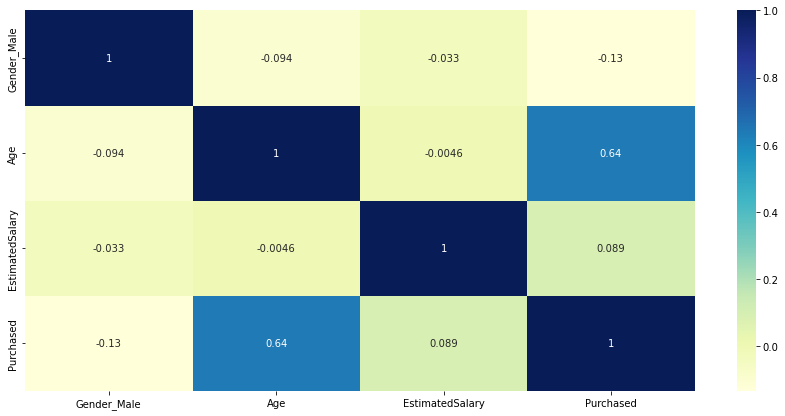

In [84]:
# Validamos correlaciones 
correlation = data_clean.corr()
fig = plt.figure (figsize = (15,7))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show() 

## División del conjunto de datos

In [85]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [86]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(data_clean, stratify='Purchased')

In [87]:
# Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 308
Longitud del Validation Set: 103
Longitud del Test Set: 103


In [88]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Purchased", axis=1)
y_train = train_set["Purchased"].copy()

In [89]:
# Conjunto de datos de pruebas
X_val = val_set.drop("Purchased", axis=1)
y_val = val_set["Purchased"].copy()

In [90]:
# Conjunto de datos de test
X_test = test_set.drop("Purchased", axis=1)
y_test = test_set["Purchased"].copy()

## Selección de los mejores modelos

In [91]:
# Pruebas con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['Ada Boost', AdaBoostClassifier()])

# Entrenamiento de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 80.56% (9.41%)
SVM: 90.60% (3.91%)
KNeighbors: 92.23% (3.27%)
GaussianNB: 80.22% (8.30%)
BernoulliNB: 77.61% (8.68%)
Decision Tree: 89.97% (4.16%)
Random Forest: 92.88% (3.47%)
Ada Boost: 89.30% (3.56%)


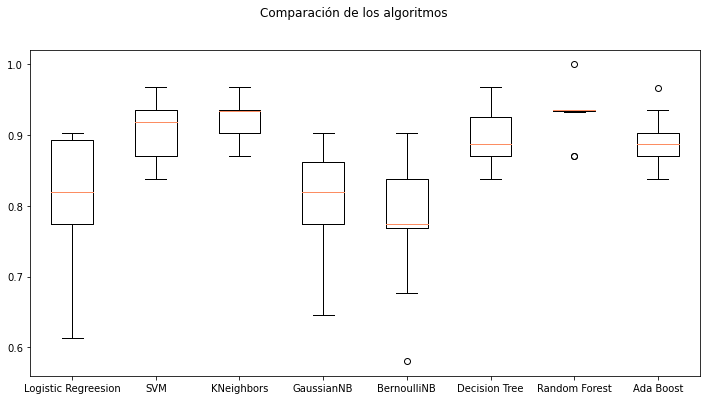

In [92]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig = plt.figure(figsize =(12,6))
fig.suptitle('Comparación de los algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hiperparametrización de los mejores modelos

In [93]:
# Búsqueda de los mejores parámetros para "K-Neighbors"
parameters1 = {"n_neighbors" : [1,3,5],
              "weights": ["uniform", "distance", None],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

model_KNN = KNeighborsClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model_KNN, param_grid=parameters1, cv=kFold, return_train_score=True)
grid_result1= grid.fit(X_train, y_train)

# mejores parámetros
grid_result1.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [94]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters2 = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid2 = GridSearchCV(estimator=model_DTC, param_grid=parameters2, cv=kFold, return_train_score=True)
grid_result2= grid2.fit(X_train, y_train)

# mejores parámetros
grid_result2.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 2,
 'splitter': 'best'}

In [95]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters3 = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid3 = GridSearchCV(estimator=model_RFC, param_grid=parameters3, cv=kFold, return_train_score=True)
grid_result3= grid3.fit(X_train, y_train)

# mejores parámetros
grid_result3.best_params_

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'sqrt'}

## Evaluación del mejor modelo

In [96]:
# Prueba de los mejores modelos con los parámetros encontrados
models_hiper = []
models_hiper.append(['KNeighbors', KNeighborsClassifier(**grid_result1.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**grid_result2.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**grid_result3.best_params_)])

# Entrenamiento de los modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

KNeighbors: 92.23% (3.27%)
Decision Tree: 91.27% (4.55%)
Random Forest: 93.22% (3.65%)


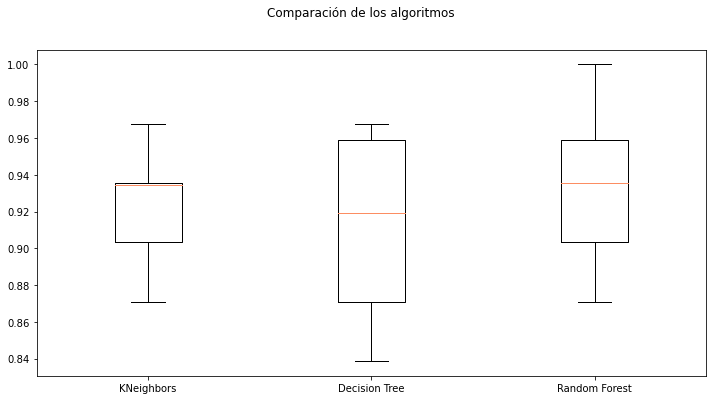

In [97]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig = plt.figure(figsize =(12,6))
fig.suptitle('Comparación de los algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [98]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
mejor_modelo = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred = mejor_modelo.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred)

0.883495145631068

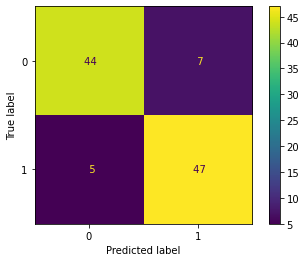

In [99]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo, X_val, y_val, values_format='3g')

In [100]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        51
           1       0.87      0.90      0.89        52

    accuracy                           0.88       103
   macro avg       0.88      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103



In [101]:
# Realizamos una nueva predición con los datos de test
y_pred2 = mejor_modelo.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred2)

0.9029126213592233

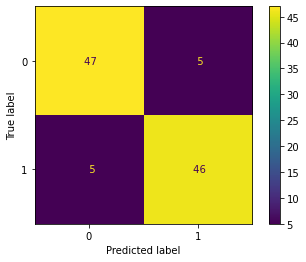

In [102]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo, X_test, y_test, values_format='3g')

In [103]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.90      0.90      0.90        51

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103

